[Data Analysis with Python Course - Numpy, Pandas, Data Visualization
](https://www.youtube.com/watch?v=GPVsHOlRBBI)

[Data Analysis with Python - Full Course for Beginners (Numpy, Pandas, Matplotlib, Seaborn)
](https://www.youtube.com/watch?v=r-uOLxNrNk8)

[Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)

Python supports the following arithmetic operators:

| Operator   | Purpose           | Example     | Result    |
|------------|-------------------|-------------|-----------|
| `+`        | Addition          | `2 + 3`     | `5`       |
| `-`        | Subtraction       | `3 - 2`     | `1`       |
| `*`        | Multiplication    | `8 * 12`    | `96`      |
| `/`        | Division          | `100 / 7`   | `14.28..` |
| `//`       | Floor Division    | `100 // 7`  | `14`      |    
| `%`        | Modulus/Remainder | `100 % 7`   | `2`       |
| `**`       | Exponent          | `5 ** 3`    | `125`     |


Evaluating conditions using Python:
Apart from arithmetic operations, Python also provides several operations for comparing numbers & variables.

| Operator    | Description                                                     |
|-------------|-----------------------------------------------------------------|
| `==`        | Check if operands are equal                                     |
| `!=`        | Check if operands are not equal                                 |
| `>`         | Check if left operand is greater than right operand             |
| `<`         | Check if left operand is less than right operand                |
| `>=`        | Check if left operand is greater than or equal to right operand |
| `<=`        | Check if left operand is less than or equal to right operand    |



In [257]:
x = 6
not x == 6
not False
( 2 >= 1 and 1 >= 1) or not (1 and True)
1 and True or  0 or False and 1


True

# Numpy

**Benefits of using Numpy arrays**

Numpy arrays offer the following benefits over Python lists for operating on numerical data:

 - Ease of use: You can write small, concise, and intuitive mathematical expressions like (kanto * weights).sum() rather than using loops & custom functions like crop_yield.
 - Performance: Numpy operations and functions are implemented internally in C++, which makes them much faster than using Python statements & loops that are interpreted at runtime

In [258]:

w1, w2, w3 = 0.3, 0.2, 0.5
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]
weights = [w1, w2, w3]

def crop_yield(region, weights):
    result =0
    for x,w in zip(region , weights):
        result += x*w
    return result
crop_yield(kanto, weights)


56.8

In [259]:
import numpy as np

kanro = np.array([12,43,12])
kanto
weight = np.array([w1,w2,w3])
weight
type(kanto)
dir(kanto)
weight[0]
np.dot(kanto, weight)
# The * operator performs an element-wise multiplication of two arrays if they have the same size. The sum method calculates the sum of numbers in an array.
(kanto * weight).sum()
arr1 = np.array([1,2,4])
arr2 = np.array([6,4,1])
arr1 * arr2
arr2.sum()

# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)


In [260]:
%%time
result = 0 
for x1 , x2 in zip(arr1, arr2):
    result += x1*x2


CPU times: user 172 ms, sys: 2.55 ms, total: 175 ms
Wall time: 174 ms


In [261]:
%%time
np.dot(arr1, arr2)


CPU times: user 147 ms, sys: 1.91 ms, total: 149 ms
Wall time: 147 ms


833332333333500000

In [262]:
%%time
np.dot(arr1_np, arr2_np)


CPU times: user 2.21 ms, sys: 215 µs, total: 2.43 ms
Wall time: 1.47 ms


833332333333500000

In [263]:
# Multi-dimensional Numpy arrays

climate = np.array([[1,2,3],
            [2,3,4],
            [7,3,6]])
climate.shape
weight
weight.shape
climate_3D = np.array([[[1,2,3],[1,2,3]],
                       [[1,2,3],[1,2,3]]])
climate_3D.shape
climate_3D.dtype
climate_3D = np.array([[[1.1,2,3],[1,2,3]],
                       [[1,2,3],[1,2,3]]])
vector = np.array([1,2,3])
climate_3D.dtype

vector @ climate
climate @ vector
np.matmul(vector, climate)


array([26, 17, 29])

In [264]:
# Working with CSV data files

import urllib.request

destination_path = '/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/climate.txt'  # Replace with your desired path

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    destination_path
)
# To read this file into a numpy array, we can use the genfromtxt function.
climate_data = np.genfromtxt(destination_path, delimiter=',', skip_header=1)
print(climate_data)
climate_data.shape
weights = np.array([0.3, 0.2, 0.5])
print("yields")
yields = climate_data @ weights
print(yields)



[[25. 76. 99.]
 [39. 65. 70.]
 [59. 45. 77.]
 ...
 [99. 62. 58.]
 [70. 71. 91.]
 [92. 39. 76.]]
yields
[72.2 59.7 65.2 ... 71.1 80.7 73.4]


 - Since we wish to add new columns, we pass the argument axis=1 to np.concatenate. The axis argument specifies the dimension for concatenation.

 - The arrays should have the same number of dimensions, and the same length along each except the dimension used for concatenation. We use the np.reshape function to change the shape of yields from (10000,) to (10000,1).

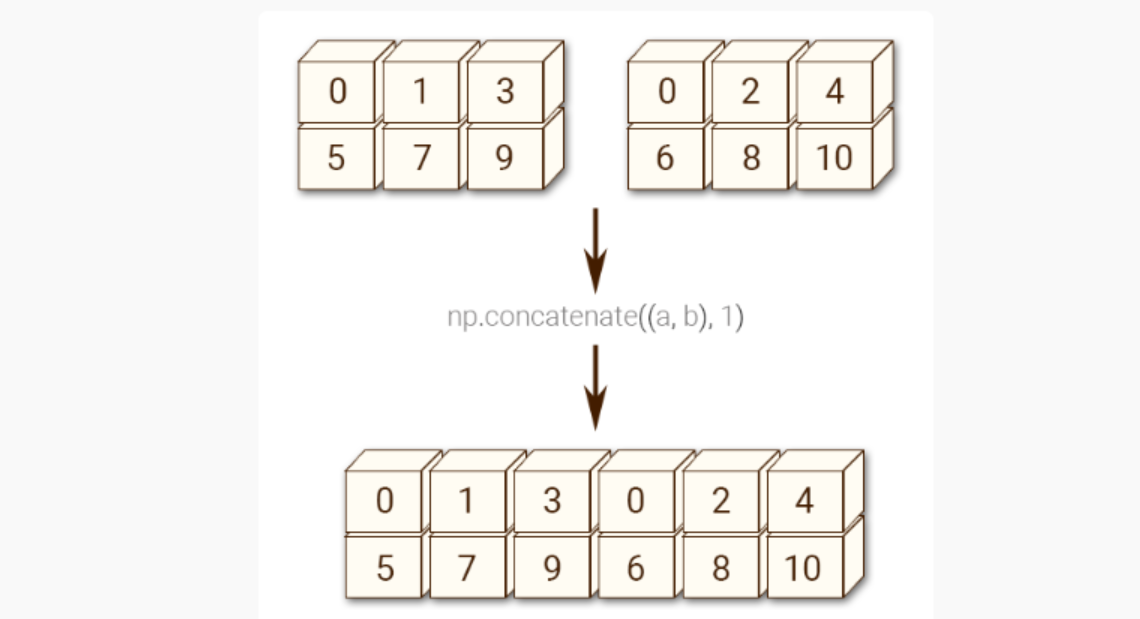

In [265]:
print(yields.shape)
print(climate_data.shape)
print(yields.reshape(10000,1))
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=1)
print(climate_results)


# The results are written back in the CSV format to the file climate_results.txt.

np.savetxt('/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/climate_results.txt', climate_results, delimiter=',', fmt='%.18e', newline='\n', header='temperature,rainfall,humidity,yeild_apples', comments='')



(10000,)
(10000, 3)
[[72.2]
 [59.7]
 [65.2]
 ...
 [71.1]
 [80.7]
 [73.4]]
[[25.  76.  99.  72.2]
 [39.  65.  70.  59.7]
 [59.  45.  77.  65.2]
 ...
 [99.  62.  58.  71.1]
 [70.  71.  91.  80.7]
 [92.  39.  76.  73.4]]


 - **Mathematics:** np.sum, np.exp, np.round, arithemtic operators
 - **Array manipulation:** np.reshape, np.stack, np.concatenate, np.split
 - **Linear Algebra:** np.matmul, np.dot, np.transpose, np.eigvals
 - **Statistics:** np.mean, np.median, np.std, np.max

In [266]:
# Arithmetic operations, broadcasting and comparison

arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])
print(arr2[0][:])
print(arr2[0][0])
print(arr2[1][2])

arr3 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])


print(arr2)

# In NumPy, when you perform an operation like adding a scalar to an array 
# (e.g., arr2 + 3), it creates a new array with the result of that operation. 
# The original array remains unchanged
arr2 +2
arr2

arr4 = arr2+2
arr4

arr2 / 2
arr2
# Element-wise multiplication
arr2 * arr3 

# Modulus with scalar
print(arr2)
print((arr2 % 4))

# Array Broadcasting
""" 
Array broadcasting is a powerful feature in NumPy that allows you to 
perform arithmetic operations on arrays of different shapes. When the 
shapes of the arrays do not match, NumPy automatically expands the 
smaller array across the larger array so that they can be combined 
element-wise.
"""
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

arr4 = np.array([4, 5, 6, 7])
print(arr4.shape)
print(arr2.shape)
print(arr2 + arr4)











[1 2 3 4]
1
7
[[1 2 3 4]
 [5 6 7 8]
 [9 1 2 3]]
[[1 2 3 4]
 [5 6 7 8]
 [9 1 2 3]]
[[1 2 3 0]
 [1 2 3 0]
 [1 1 2 3]]
(4,)
(3, 4)
[[ 5  7  9 11]
 [ 9 11 13 15]
 [13  6  8 10]]


When the expression `arr2 + arr4` is evaluated, `arr4` (which has the shape `(4,)`) is replicated three times to match the shape `(3, 4)` of `arr2`. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" width="360">

Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

In [267]:
arr5 = np.array([7,8])
arr5.shape

# arr2 + arr5

# Array Comparison

arr1 = np.array([[1,2,3],[2,3,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2

arr1 = np.array([[1,4,3],[7,8,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2
arr1 >= arr2
"""  
Array comparison is frequently used to count the number of equal elements 
in two arrays using the `sum` method. Remember that `True` evaluates to `1` 
and `False` evaluates to `0` when booleans are used in arithmetic operations.
"""
(arr1 == arr2).sum()
arr3 = np.array([1,1,0])
arr3.sum()


# Array indexing and slicing
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]
     ])

arr3.shape
"""
The first dimension (3) refers to the number of matrices (slices).
The second dimension (2) refers to the number of rows in each matrix.
The third dimension (4) refers to the number of columns in each matrix.
 """

arr3[1][1][1]
arr3[1,1,1]
# Subarray using ranges
arr3[1:, 0:1, :2]

# Mixing indices and ranges
arr3[1:, 1, 3]

arr5 = np.array([7,8])
arr5.shape

# arr2 + arr5

# Array Comparison

arr1 = np.array([[1,2,3],[2,3,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2

arr1 = np.array([[1,4,3],[7,8,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2
arr1 >= arr2
"""  
Array comparison is frequently used to count the number of equal elements 
in two arrays using the `sum` method. Remember that `True` evaluates to `1` 
and `False` evaluates to `0` when booleans are used in arithmetic operations.
"""
(arr1 == arr2).sum()
arr3 = np.array([1,1,0])
arr3.sum()


# Array indexing and slicing
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]
     ])

arr3.shape
"""
The first dimension (3) refers to the number of matrices (slices).
The second dimension (2) refers to the number of rows in each matrix.
The third dimension (4) refers to the number of columns in each matrix.
 """

arr3[1][1][1]
arr3[1,1,1]
# Subarray using ranges
arr3[1:, 0:1, :2]

# Mixing indices and ranges
arr3[1:, 1, 3]
arr3[1:, 1, :3]


arr5 = np.array([7,8])
arr5.shape

# arr2 + arr5

# Array Comparison

arr1 = np.array([[1,2,3],[2,3,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2

arr1 = np.array([[1,4,3],[7,8,6]])
arr2 = np.array([[1,2,3],[2,3,6]])
arr1 == arr2
arr1 != arr2
arr1 >= arr2
"""  
Array comparison is frequently used to count the number of equal elements 
in two arrays using the `sum` method. Remember that `True` evaluates to `1` 
and `False` evaluates to `0` when booleans are used in arithmetic operations.
"""
(arr1 == arr2).sum()
arr3 = np.array([1,1,0])
arr3.sum()


# Array indexing and slicing
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]
     ])

arr3.shape
"""
The first dimension (3) refers to the number of matrices (slices).
The second dimension (2) refers to the number of rows in each matrix.
The third dimension (4) refers to the number of columns in each matrix.
 """

arr3[1][1][1]
arr3[1,1,1]
# Subarray using ranges
arr3[1:, 0:1, :2]

# Mixing indices and ranges
arr3[1:, 1, 3]
arr3[1:, 1, :3]


arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]
     ])
arr3[1:, 1, 0:3]
arr3[1]





array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [268]:
# Other ways of creating Numpy arrays

np.zeros((3,2))
np.ones((4,4))

np.eye(4,4)
np.eye(3,4)
# Random vector
np.random.rand(5)
np.random.randn(2,3)
# Fixed value
np.full([2,3],7)
print(np.arange(10,90,4))
print(np.random.rand(20))
# Equally spaced numbers in a range
np.linspace(10,100,9)

[10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86]
[0.22381344 0.86579514 0.78151828 0.47140256 0.15085594 0.45508544
 0.63519363 0.85234941 0.72418711 0.13359455 0.65431662 0.24737577
 0.24787104 0.21273722 0.4759005  0.0200534  0.94146289 0.33592557
 0.6313413  0.39879552]


array([ 10.  ,  21.25,  32.5 ,  43.75,  55.  ,  66.25,  77.5 ,  88.75,
       100.  ])

# Pandas

![](https://i.imgur.com/zfxLzEv.png)



In [269]:
import pandas as pd
from urllib.request import urlretrieve


In [270]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, '/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/italy-covid-daywise.csv')
sourcepath = '/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/italy-covid-daywise.csv'
covid_df = pd.read_csv(sourcepath)
covid_df
type(covid_df)
covid_df.info()
covid_df.describe()
covid_df.columns
len(covid_df.columns)
covid_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


(248, 4)

In [271]:
# Retrieving data from a data frame

# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

print(type(covid_data_list))

# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

print(type(covid_data_dict))

print(covid_data_dict['new_cases'])
covid_df['new_cases']

type(covid_df['new_cases'])

covid_df['new_cases'][len(covid_df['new_cases'])-1]
last_element = covid_df['new_cases'].iloc[-1]
last_element


<class 'list'>
<class 'dict'>
[1444, 1365, 996, 975, 1326]


1326.0

In [272]:
%%time
last_element_len = covid_df['new_cases'][len(covid_df['new_cases'])-1]
last_element_len

CPU times: user 82 µs, sys: 16 µs, total: 98 µs
Wall time: 103 µs


1326.0

In [273]:
%%time
last_element_iloc = covid_df['new_cases'].iloc[-1]
last_element_iloc

CPU times: user 79 µs, sys: 15 µs, total: 94 µs
Wall time: 99.9 µs


1326.0

In [274]:
# Pandas also provides the .at method to retrieve the element at a specific row & column directly.

covid_df.at[246, 'new_cases']
covid_df.at[240, 'new_cases']
covid_df.at[247, 'new_cases']
# Further, you can also pass a list of columns within the 
# indexing notation [] to access a subset of the data frame
# with just the given columns.
cases_Df = covid_df[['new_cases','new_tests']]
cases_Df
covid_df_copy = covid_df.copy()
covid_df_copy
covid_df_copy.loc[247]
type(covid_df_copy.loc[247])
covid_df_copy.head()
covid_df_copy.head(5)
covid_df_copy.tail(5)

covid_df_copy.at[243,'new_tests']

covid_df.at[0, 'new_tests']
type(covid_df.at[0, 'new_tests'])
# We can find the first index that doesn't contain a NaN value 
# using a column's first_valid_index method.
covid_df.new_tests.first_valid_index()
print(covid_df.loc[108:113])
covid_df.sample()
covid_df.sample(10)




           date  new_cases  new_deaths  new_tests
108  2020-04-17     3786.0       525.0        NaN
109  2020-04-18     3493.0       575.0        NaN
110  2020-04-19     3491.0       480.0        NaN
111  2020-04-20     3047.0       433.0     7841.0
112  2020-04-21     2256.0       454.0    28095.0
113  2020-04-22     2729.0       534.0    44248.0


,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
80,2020-03-20,5322.0,429.0,NaN
166,2020-06-14,346.0,78.0,29545.0
212,2020-07-30,288.0,6.0,33396.0
173,2020-06-21,264.0,49.0,24581.0
228,2020-08-15,574.0,3.0,25937.0
111,2020-04-20,3047.0,433.0,7841.0
54,2020-02-23,62.0,2.0,NaN
181,2020-06-29,174.0,22.0,15484.0
15,2020-01-15,0.0,0.0,NaN


Here's a summary of the functions & methods we looked at in this section:

- `covid_df['new_cases']` - Retrieving columns as a `Series` using the column name
- `new_cases[243]` - Retrieving values from a `Series` using an index
- `covid_df.at[243, 'new_cases']` - Retrieving a single value from a data frame
- `covid_df.copy()` - Creating a deep copy of a data frame
- `covid_df.loc[243]` - Retrieving a row or range of rows of data from the data frame
- `head`, `tail`, and `sample` - Retrieving multiple rows of data from the data frame
- `covid_df.new_tests.first_valid_index` - Finding the first non-empty index in a series


In [275]:
# Analyzing data from data frames

total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))


The number of reported cases is 271515 and the number of reported deaths is 35497.


In [276]:
# Querying and sorting rows

highnewcases = covid_df.new_cases > 1000
print(type(highnewcases))
print(len(highnewcases))
print(highnewcases)
print(covid_df[highnewcases])

high_cases_df = covid_df[covid_df.new_cases > 1000]
print(type(high_cases_df))

len(high_cases_df)





<class 'pandas.core.series.Series'>
248
0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool
           date  new_cases  new_deaths  new_tests
68   2020-03-08     1247.0        36.0        NaN
69   2020-03-09     1492.0       133.0        NaN
70   2020-03-10     1797.0        98.0        NaN
72   2020-03-12     2313.0       196.0        NaN
73   2020-03-13     2651.0       189.0        NaN
..          ...        ...         ...        ...
241  2020-08-28     1409.0         5.0    65135.0
242  2020-08-29     1460.0         9.0    64294.0
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
247  2020-09-03     1326.0         6.0        NaN

[72 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


72

In [277]:
# from IPython.display import display
# with pd.option_context('display.max_rows', 100):
#     display(covid_df[covid_df.new_cases > 1000])

total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
positive_rate = total_cases / total_tests
positive_rate

0.05206657403227681

In [278]:
"""
let's try to determine the days when the ratio of cases reported 
to tests conducted is higher than the overall positive_rate.
"""


"\nlet's try to determine the days when the ratio of cases reported \nto tests conducted is higher than the overall positive_rate.\n"

In [279]:
%%time
covid_df.loc[(covid_df.new_cases)  / (covid_df.new_tests) > positive_rate]


CPU times: user 713 µs, sys: 0 ns, total: 713 µs
Wall time: 707 µs


,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [280]:
%%time
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]


CPU times: user 959 µs, sys: 0 ns, total: 959 µs
Wall time: 953 µs


In [281]:
# The result of performing an operation on two columns is a new series.
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df
covid_df['final_result'] = covid_df.positive_rate > positive_rate
print(sum(covid_df['final_result'] == True))
print(covid_df['final_result'])
true_indices = covid_df.index[covid_df['final_result']].tolist()
print(true_indices)
print(covid_df.loc[covid_df['final_result'] == True])

covid_df.drop(columns='positive_rate', inplace=True)
covid_df

12
0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: final_result, Length: 248, dtype: bool
[111, 112, 113, 114, 116, 117, 118, 120, 123, 124, 125, 128]
           date  new_cases  new_deaths  new_tests  positive_rate  final_result
111  2020-04-20     3047.0       433.0     7841.0       0.388598          True
112  2020-04-21     2256.0       454.0    28095.0       0.080299          True
113  2020-04-22     2729.0       534.0    44248.0       0.061675          True
114  2020-04-23     3370.0       437.0    37083.0       0.090877          True
116  2020-04-25     3021.0       420.0    38676.0       0.078110          True
117  2020-04-26     2357.0       415.0    24113.0       0.097748          True
118  2020-04-27     2324.0       260.0    26678.0       0.087113          True
120  2020-04-29     2091.0       382.0    38589.0       0.054186          True
123  2020-05-02     1965.0       269.

,date,new_cases,new_deaths,new_tests,final_result
0,2019-12-31,0.0,0.0,NaN,False
1,2020-01-01,0.0,0.0,NaN,False
2,2020-01-02,0.0,0.0,NaN,False
3,2020-01-03,0.0,0.0,NaN,False
4,2020-01-04,0.0,0.0,NaN,False
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,False
244,2020-08-31,1365.0,4.0,42583.0,False
245,2020-09-01,996.0,6.0,54395.0,False
246,2020-09-02,975.0,8.0,NaN,False


In [282]:
# Sorting rows using column values
print(covid_df.sort_values('new_cases', ascending=False).head(10))
print(covid_df.sort_values('new_deaths', ascending=False).head(10))

# It appears that daily deaths hit a peak just about a week after 
# the peak in daily new cases.
covid_df.sort_values('new_cases').head(10)



          date  new_cases  new_deaths  new_tests  final_result
82  2020-03-22     6557.0       795.0        NaN         False
87  2020-03-27     6153.0       660.0        NaN         False
81  2020-03-21     5986.0       625.0        NaN         False
89  2020-03-29     5974.0       887.0        NaN         False
88  2020-03-28     5959.0       971.0        NaN         False
83  2020-03-23     5560.0       649.0        NaN         False
80  2020-03-20     5322.0       429.0        NaN         False
85  2020-03-25     5249.0       743.0        NaN         False
90  2020-03-30     5217.0       758.0        NaN         False
86  2020-03-26     5210.0       685.0        NaN         False
          date  new_cases  new_deaths  new_tests  final_result
88  2020-03-28     5959.0       971.0        NaN         False
89  2020-03-29     5974.0       887.0        NaN         False
92  2020-04-01     4053.0       839.0        NaN         False
91  2020-03-31     4050.0       810.0        NaN       

,date,new_cases,new_deaths,new_tests,final_result
172,2020-06-20,-148.0,47.0,29875.0,False
0,2019-12-31,0.0,0.0,NaN,False
29,2020-01-29,0.0,0.0,NaN,False
30,2020-01-30,0.0,0.0,NaN,False
32,2020-02-01,0.0,0.0,NaN,False
33,2020-02-02,0.0,0.0,NaN,False
34,2020-02-03,0.0,0.0,NaN,False
36,2020-02-05,0.0,0.0,NaN,False
37,2020-02-06,0.0,0.0,NaN,False
38,2020-02-07,0.0,0.0,NaN,False


In [283]:
print(covid_df.loc[169:175])
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2
covid_df.loc[169:175]


           date  new_cases  new_deaths  new_tests  final_result
169  2020-06-17      210.0        34.0    33957.0         False
170  2020-06-18      328.0        43.0    32921.0         False
171  2020-06-19      331.0        66.0    28570.0         False
172  2020-06-20     -148.0        47.0    29875.0         False
173  2020-06-21      264.0        49.0    24581.0         False
174  2020-06-22      224.0        24.0    16152.0         False
175  2020-06-23      221.0        23.0    23225.0         False


,date,new_cases,new_deaths,new_tests,final_result
169,2020-06-17,210.0,34.0,33957.0,False
170,2020-06-18,328.0,43.0,32921.0,False
171,2020-06-19,331.0,66.0,28570.0,False
172,2020-06-20,297.5,47.0,29875.0,False
173,2020-06-21,264.0,49.0,24581.0,False
174,2020-06-22,224.0,24.0,16152.0,False
175,2020-06-23,221.0,23.0,23225.0,False


In [284]:
# Working with dates
print(covid_df.date)
"""
The data type of date is currently object, so Pandas does not know that 
this column is a date. We can convert it into a datetime column using 
the pd.to_datetime method.
"""
type(covid_df.date)
covid_df['date'] = pd.to_datetime(covid_df.date)
print(covid_df.date)

"""     
You can see that it now has the datatype datetime64. We can now extract 
different parts of the data into separate columns, using the DatetimeIndex
 class (view docs).
"""
covid_df['year']   =covid_df['date'].dt.year 
covid_df['month']  =covid_df['date'].dt.month 
covid_df['day']    =covid_df['date'].dt.day 
covid_df['weekday']=covid_df['date'].dt.weekday 
covid_df

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object
0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]


,date,new_cases,new_deaths,new_tests,final_result,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,False,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,False,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,False,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,False,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,False,2020,1,4,5
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,False,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,False,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,False,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,False,2020,9,2,2


In [285]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may
covid_df_may_metrics = covid_df_may[['new_cases','new_deaths','new_tests','month']]
covid_df_may_metrics
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals
print(type(covid_may_totals))
print(type(covid_df_may_metrics))
covid_may_totals
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

covid_df.new_cases.mean()
covid_df[covid_df.weekday == 6].new_cases.mean()




<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


1247.2571428571428

In [295]:
# Grouping and aggregation
""" 
As a next step, we might want to summarize the day-wise data and create 
a new dataframe with month-wise data. We can use the groupby function to 
create a group for each month, select the columns we wish to aggregate, 
and aggregate them using the sum method.
"""
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_df
print(covid_df)
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['new_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df

          date  new_cases  new_deaths  new_tests  final_result  year  month  \
0   2019-12-31        0.0         0.0        NaN         False  2019     12   
1   2020-01-01        0.0         0.0        NaN         False  2020      1   
2   2020-01-02        0.0         0.0        NaN         False  2020      1   
3   2020-01-03        0.0         0.0        NaN         False  2020      1   
4   2020-01-04        0.0         0.0        NaN         False  2020      1   
..         ...        ...         ...        ...           ...   ...    ...   
243 2020-08-30     1444.0     35473.0    53541.0         False  2020      8   
244 2020-08-31     1365.0     35477.0    42583.0         False  2020      8   
245 2020-09-01      996.0     35483.0    54395.0         False  2020      9   
246 2020-09-02      975.0     35491.0        NaN         False  2020      9   
247 2020-09-03     1326.0     35497.0        NaN         False  2020      9   

     day  weekday  total_cases  total_tests  total_

,date,new_cases,new_deaths,new_tests,final_result,year,month,day,weekday,total_cases,total_tests,total_deaths,location
0,2019-12-31,0.0,0.0,NaN,False,2019,12,31,1,0.0,NaN,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,False,2020,1,1,2,0.0,NaN,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,False,2020,1,2,3,0.0,NaN,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,False,2020,1,3,4,0.0,NaN,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,False,2020,1,4,5,0.0,NaN,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,4872423.0,53541.0,False,2020,8,30,6,267298.5,4182478.0,349743648.0,Italy
244,2020-08-31,1365.0,4907900.0,42583.0,False,2020,8,31,0,268663.5,4225061.0,354651548.0,Italy
245,2020-09-01,996.0,4943383.0,54395.0,False,2020,9,1,1,269659.5,4279456.0,359594931.0,Italy
246,2020-09-02,975.0,4978874.0,NaN,False,2020,9,2,2,270634.5,NaN,364573805.0,Italy


In [287]:
# Merging data from multiple sources

urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            '/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/locations.csv')
locations_df = pd.read_csv('/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/locations.csv')
locations_df
locations_df['location']
locations_df[locations_df.location == 'Italy']

"""   
We can merge this data into our existing data frame by adding more columns. 
However, to merge two data frames, we need at least one common column. 
Let's insert a location column in the covid_df dataframe with all values 
set to "Italy".

"""
covid_df['location'] = "Italy"
covid_df

merged_df = covid_df.merge(locations_df, on='location')
merged_df

# We can now calculate metrics like cases per million, deaths per million, and tests per million.
"""  
Per Million Calculation:

When you want to express a quantity relative to a certain scale (in this case, per million), you need to adjust the number accordingly.
By multiplying total_cases by 1e6, you are scaling the total cases up to represent how many cases would exist in a population of one million people.
"""
merged_df['cases_per_million'] = merged_df['total_cases']* 1e6 / merged_df['population']
merged_df
# merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
# merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population




,date,new_cases,new_deaths,new_tests,final_result,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million
0,2019-12-31,0.0,0.0,NaN,False,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,False,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,False,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,False,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,False,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,35473.0,53541.0,False,2020,8,30,6,267298.5,4182478.0,4872423.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,35477.0,42583.0,False,2020,8,31,0,268663.5,4225061.0,4907900.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,35483.0,54395.0,False,2020,9,1,1,269659.5,4279456.0,4943383.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,35491.0,NaN,False,2020,9,2,2,270634.5,NaN,4978874.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


In [296]:
# Writing data back to files


"""  
After completing your analysis and adding new columns, 
you should write the results back to a file. Otherwise, 
the data will be lost when the Jupyter notebook shuts down. 
Before writing to file, let us first create a data frame containing 
just the columns we wish to record.
"""
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'total_deaths',
                       'cases_per_million']]

result_df
result_df.to_csv('/media/ferganey/Data/00_Main_Folder/Shared_For_ALL/result_df.csv', index=None)
result_df

,date,new_cases,total_cases,new_deaths,new_tests,total_tests,total_deaths,cases_per_million
0,2019-12-31,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
1,2020-01-01,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
2,2020-01-02,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
3,2020-01-03,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
4,2020-01-04,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,35473.0,53541.0,4182478.0,4872423.0,4420.946386
244,2020-08-31,1365.0,268663.5,35477.0,42583.0,4225061.0,4907900.0,4443.522614
245,2020-09-01,996.0,269659.5,35483.0,54395.0,4279456.0,4943383.0,4459.995818
246,2020-09-02,975.0,270634.5,35491.0,NaN,NaN,4978874.0,4476.121695


<AxesSubplot:>

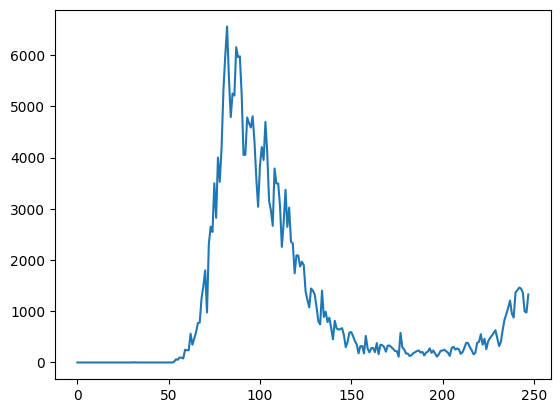

In [297]:
# Basic Plotting with Pandas

result_df.new_cases.plot()




In [298]:
result_df.set_index('date', inplace=True)

In [299]:
result_df

,new_cases,total_cases,new_deaths,new_tests,total_tests,total_deaths,cases_per_million
date,,,,,,,
2019-12-31,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
2020-01-01,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
2020-01-02,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
2020-01-03,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
2020-01-04,0.0,0.0,0.0,NaN,NaN,0.0,0.000000
...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,35473.0,53541.0,4182478.0,4872423.0,4420.946386
2020-08-31,1365.0,268663.5,35477.0,42583.0,4225061.0,4907900.0,4443.522614
2020-09-01,996.0,269659.5,35483.0,54395.0,4279456.0,4943383.0,4459.995818


<AxesSubplot:xlabel='date'>

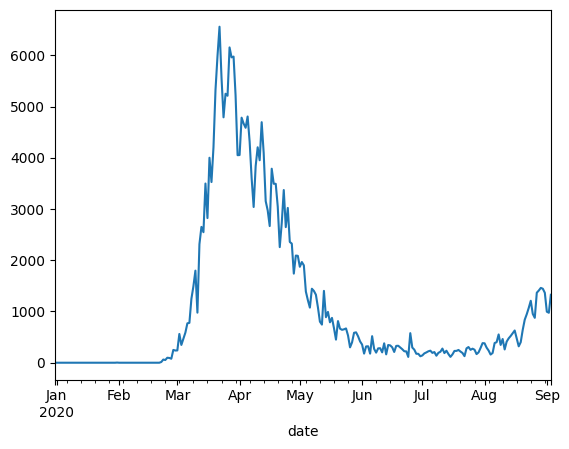

In [300]:
result_df.loc['2020-09-01']
result_df.new_cases.plot()

<AxesSubplot:xlabel='date'>

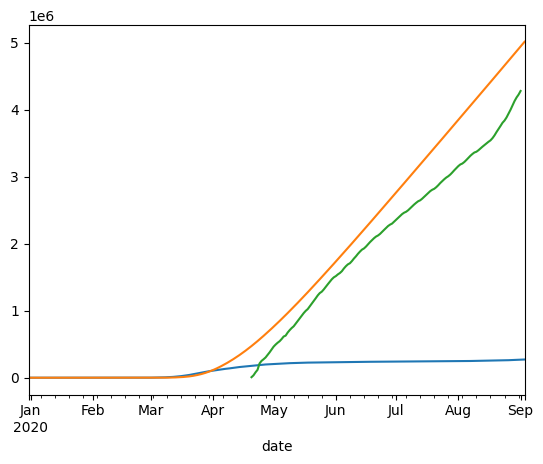

In [303]:
# will be continous cause it is caummulative not discrete
result_df.total_cases.plot()
result_df.total_deaths.plot()
result_df.total_tests.plot()


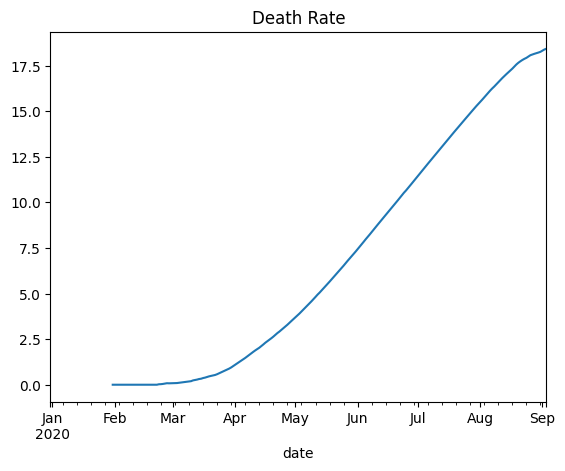

In [306]:
death_rate = result_df.total_deaths / result_df.total_cases

death_rate.plot(title='Death Rate');


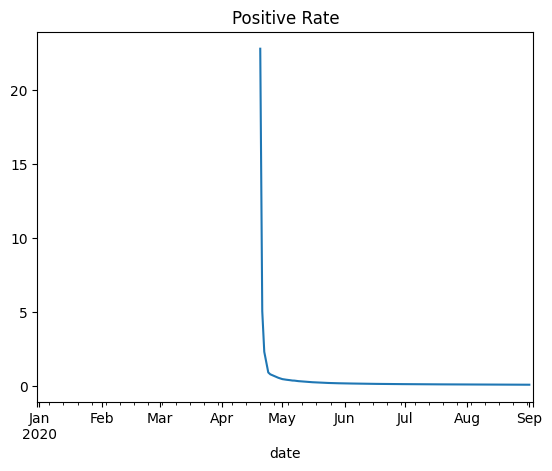

In [308]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

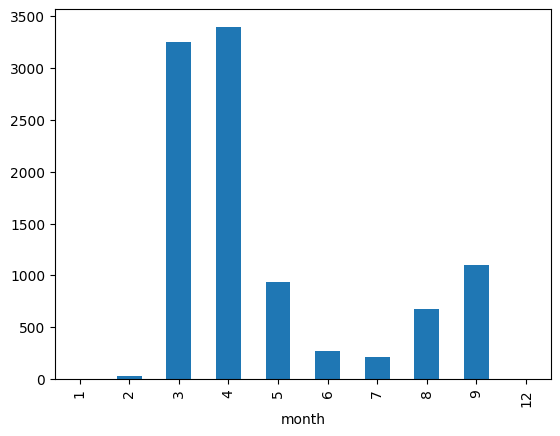

In [309]:
covid_month_df.new_cases.plot(kind='bar');


# Data Visualization with Matplotlib and seaborn

# Projects on Data Analysis